# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np


warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

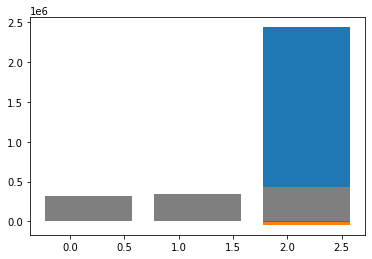

In [46]:
data_item = data.groupby("ItemType").agg({"RetailSales":"sum","RetailTransfers":"sum","WarehouseSales":"sum"})
#plt.bar(data_item.index,(data_item["RetailSales"],data_item["RetailTransfers"]))
#,"RetailTransfers","WarehouseSales"]])
#plt.xlabel("ItemType")
#plt.ylabel("ItemType")
#plt.xticks(range(len(df_group["Fuel Type"])),[e for e in df_group["Fuel Type"]], rotation=45, horizontalalignment="right")
#plt.show()

labels = ["RetailSales","RetailTransfers","WarehouseSales"]
x = np.arange(len(labels))
width = 0.35

dicti_types={}
for i in range(len(data_item.index)):
    dicti_types[data_item.index[i]] = list(data_item.iloc[i])

fig, ax = plt.subplots()
lista=[]
for key,value in dicti_types.items():
    lista.append(ax.bar(x + width/2, value, label=key))
    #rects2 = ax.bar(x + width/2, women_means, width, label='Women')
    
#bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)



KeyError: 1

In [ ]:
"""
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [29]:
list(data_item.iloc[0])

[209763.10999999984, 234924.44000000003, 2437617.319999994]

In [34]:
dicti_items={}
for i in range(len(data_item.index)):
    dicti_items[data_item.index[i]] = list(data_item.iloc[i])
dicti_items

{'BEER': [209763.10999999984, 234924.44000000003, 2437617.319999994],
 'DUNNAGE': [0.0, 0.0, -45331.0],
 'KEGS': [0.0, 0.0, 43558.0],
 'LIQUOR': [309847.849999999, 334176.4099999994, 33173.31999999996],
 'NON-ALCOHOL': [8109.969999999999, 9058.369999999999, 8656.720000000001],
 'REF': [281.3400000000001, 171.92000000000002, -6754.0],
 'STR_SUPPLIES': [995.98, 3594.7, 0.0],
 'WINE': [313400.41999999224, 340710.51000000094, 433009.4699999996]}

In [25]:
data_item.index[0]

'BEER'

In [17]:
data_item = data.groupby("ItemType").agg({"RetailSales":"sum","RetailTransfers":"sum","WarehouseSales":"sum"})

In [20]:
data_item

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [57]:
data_sales = data.groupby("Supplier").agg({"RetailSales":"sum","RetailTransfers":"sum","WarehouseSales":"sum"})
data_sales["TotalSales"] = data_sales["RetailSales"]+data_sales["RetailTransfers"]+data_sales["WarehouseSales"]
data_bestsales = data_sales.sort_values("TotalSales",ascending=False)[:10]
data_bestsales

,RetailSales,RetailTransfers,WarehouseSales,TotalSales
Supplier,,,,
MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
THE WINE GROUP,25758.15,28462.05,26603.78,80823.98


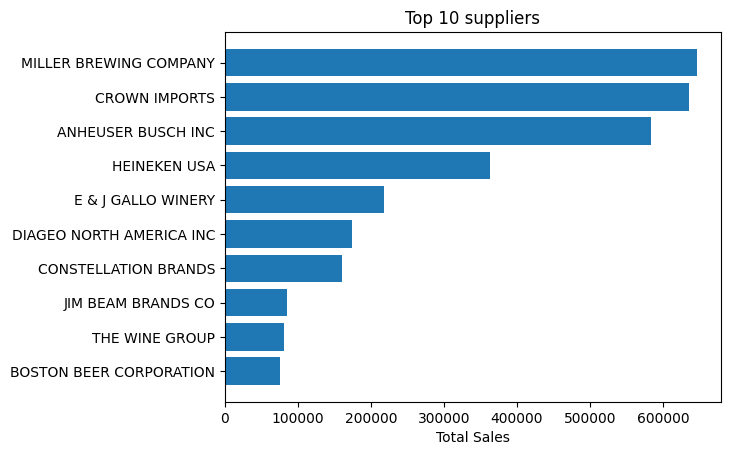

In [66]:
fig, ax = plt.subplots()

suppliers = list(data_bestsales.index)
y_ticks = np.arange(len(suppliers))
values = data_bestsales["TotalSales"]

ax.barh(y_ticks, values, align='center')
ax.set_yticks(y_ticks)
ax.set_yticklabels(suppliers)
ax.invert_yaxis()  # ascending = False
ax.set_xlabel('Total Sales')
ax.set_title('Top 10 suppliers')

plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [71]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [72]:
data_meanSales = data.groupby("Month").agg({"RetailSales":"mean","RetailTransfers":"mean","WarehouseSales":"mean"})
data_meanSales

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


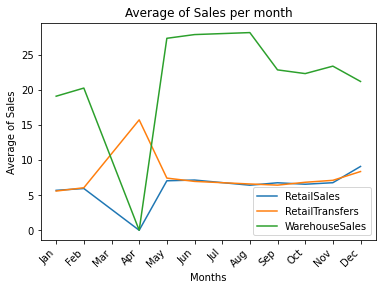

In [85]:
fig, ax = plt.subplots()
ax.plot(data_meanSales["RetailSales"])
ax.plot(data_meanSales["RetailTransfers"])
ax.plot(data_meanSales["WarehouseSales"])
ax.set_ylabel("Average of Sales")
ax.set_xlabel("Months")
labelPos = np.arange(1,13)
tickLabel=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(labelPos,tickLabel, rotation=45, horizontalalignment="right")
ax.legend(["RetailSales","RetailTransfers", "WarehouseSales"])
plt.title("Average of Sales per month")
plt.show()

## 4. Plot the same information as above but as a bar chart.

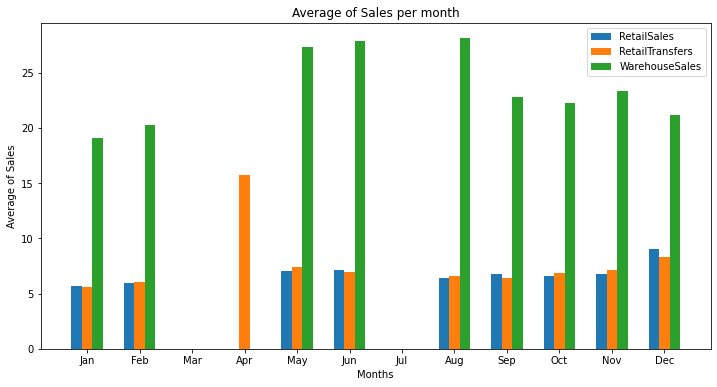

In [125]:
fig, ax = plt.subplots(figsize=(12,6))
x=data_meanSales.index
width=0.2
ax.bar(x-width,data_meanSales["RetailSales"],width)
ax.bar(x,data_meanSales["RetailTransfers"],width)
ax.bar(x+width,data_meanSales["WarehouseSales"],width)
ax.set_ylabel("Average of Sales")
ax.set_xlabel("Months")
labelPos = np.arange(1,13)
dic_months={{}1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"D"}abelPos,tickLabel)
ax.legend(["RetailSales","RetailTransfers", "WarehouseSales"])
plt.title("Average of Sales per month")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

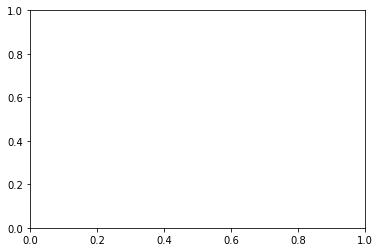

In [102]:
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]


x = np.arange(1,13)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, data_meanSales["RetailSales"], width, label="RetailSales")
rects2 = ax.bar(x - width, data_meanSales["RetailTransfers"], width, label='RetailTransfers')
rects3 = ax.bar(x + width, data_meanSales["WarehouseSales"], width, label='WarehouseSales')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Average of Sales")
ax.set_xlabel("Months")
plt.title("Average of Sales per month")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["RetailSales","RetailTransfers", "WarehouseSales"])

fig.tight_layout()

plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*